# Define a Class

In [3]:
#__init__() is not a constructor, The function __init__() is called immediately after
# the object is created and is used to initialize it.
class person:
      def __init__(self,firstname,lastname):
          print(self)
          self.first = firstname
          self.last = lastname
      def __del__(self):
         print('Destructor called, person deleted.')
myname = person("Sakib","Hasan")
print(myname)
print(myname.first)
print(myname.last)
del myname
myname.first

Sakib
Hasan
Destructor called, person deleted.


NameError: name 'myname' is not defined

# __new__() method

*   __new__() is always called before __init__().
* First argument is the class itself which is passed implicitly.
* Always return a valid object from __new__(). Not mandatory, but its main use is to create and return an object

In [ ]:
#__new method
class person:

    def __new__(cls,*args,**kwargs):
        print("Inside new method....")
        print(cls)
        print(args)
        print(kwargs)
        # create our object and return it
        obj = super().__new__(cls)
        return obj

    def __init__(self,firstname,lastname):
          print("Inside init method....")
          self.first = firstname
          self.last = lastname


myname =  ("Sakib","Hasan")
print(myname.first)
print(myname.last)

Inside new method....
<class '__main__.person'>
('Sakib', 'Hasan')
{}
Inside init method....
Sakib
Hasan


In [ ]:
def val(a):
    for i in range(1,5):
        if a== i:
            return True
    return False
print(val(3))

x = 'a'
x.d

True


In [7]:
# restrict the number of objects created from a class.
class Person1:
    MAX_Inst = 4
    Inst_created = 0

    def __new__(cls,*args,**kwargs):
        if (cls.Inst_created >= cls.MAX_Inst):
            raise ValueError("Cannot create more objects")
        cls.Inst_created += 1
        print('Inside new method....')
        return super().__new__(cls)

    def __init__(self,firstname,lastname):
          print("Inside init method....")
          self.first = firstname
          self.last = lastname


myname1 = Person1("Sakib","Hasan1")
print(Person1.Inst_created)
myname2 = Person1("Sakib","Hasan2")
print(Person1.Inst_created)
myname3 = Person1("Sakib","Hasan3")
print(Person1.Inst_created)
myname4 = Person1("Sakib","Hasan4")
print(Person1.Inst_created)
# myname5 = Person1("Sakib","Hasan5")



Inside new method....
Inside init method....
1
Inside new method....
Inside init method....
2
Inside new method....
Inside init method....
3
Inside new method....
Inside init method....
4


In [9]:
class MyCompany:

    # methods
    def __init__(self, compname, revenue, employeesize):
        self.name = compname
        self.revenue = revenue
        self.no_of_employees = employeesize

    def productivity(self):
        return self.revenue/self.no_of_employees

Bank = MyCompany('ABC Bank', 5000,200)
# Bank.productivity()

MyCompany.productivity(Bank)

25.0

##**Variables::**
one which is declared inside __init__  are called **Instance Variables** or local variables and One which is defined outside of methods are called **Class Variables or global variables**. You can access these variables anywhere in the class.*

In [ ]:
class MyCompany:
    #Class Variable
    growth = 0.1

    def __init__(self, compname, revenue, employeesize):
        #Instance Variables
        self.name = compname
        self.revenue = revenue
        self.no_of_employees = employeesize

MyCompany.growth

0.1

## **Methods**

* **Instance Method** takes self as the first argument. They are also called Object or regular method.
* **Class Method** takes cls as the first argument. cls refers to class. To access a class variable within a method, we use the **@classmethod** decorator, and pass the class to the method
* **Static Method** doesn't take anything as the first argument.





In [20]:
class Cab:

    #Initialise variables for first iteration
    numberofcabs  = 0
    numpassengers = 0

    def __init__(self,driver,kms,places,pay,passengers):
        self.driver = driver
        self.running = kms
        self.places = places
        self.bill = pay
        Cab.numberofcabs  =  Cab.numberofcabs + 1
        Cab.numpassengers =  Cab.numpassengers + passengers

    #Returns price of cab fare per km
    def rateperkm(self):
        return self.bill/self.running

    #Returns number of cabs running
    @classmethod
    def noofcabs(cls):
        return cls.numberofcabs

    #Returns average number of passengers travelling in a cab
    @classmethod
    def avgnoofpassengers(cls):
        return int(cls.numpassengers/cls.numberofcabs)

    @staticmethod
    def billvalidation(pay):
        return int(pay) > 0
print (dir(Cab))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'avgnoofpassengers', 'billvalidation', 'noofcabs', 'numberofcabs', 'numpassengers', 'rateperkm']


In [16]:
firstcab  = Cab("Ramesh", 80, ['Delhi', 'Noida'], 2200, 3)
secondcab = Cab("Suresh", 60, ['Gurgaon', 'Noida'], 1500, 1)
thirdcab  = Cab("Dave", 20, ['Gurgaon', 'Noida'], 680, 2)

print(firstcab.driver)

print(secondcab.driver)

print(thirdcab.driver)

print(firstcab.rateperkm())

print(secondcab.rateperkm())

print(thirdcab.rateperkm())

print(Cab.noofcabs())

print(Cab.avgnoofpassengers())

print(Cab.billvalidation(0.2))

Ramesh
Suresh
Dave
27.5
25.0
34.0
3
2
False


# Inheritance
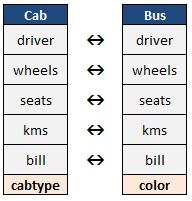

In [ ]:
class Vehicle:
    def __init__(self,driver,wheels,seats):
        self.driver = driver
        self.noofwheels = wheels
        self.noofseats = seats

class Cab(Vehicle):
    pass

cab_1 = Cab('Sandy',4, 2)
cab_1.driver

'Sandy'

In [ ]:
class Vehicle:
    minimumrate = 50
    def __init__(self,driver,wheels,seats,kms,bill):
        self.driver = driver
        self.noofwheels = wheels
        self.noofseats = seats
        self.running = kms
        self.bill = bill

    def rateperkm(self):
        return self.bill/self.running

class Cab(Vehicle):
    minimumrate = 75
    def __init__(self,driver,wheels,seats,kms,bill,cabtype):
        Vehicle.__init__(self,driver,wheels,seats,kms,bill)
        #super().__init__(driver,wheels,seats,kms,bill)
        self.category = cabtype

class Bus(Vehicle):
    minimumrate = 25
    def __init__(self,driver,wheels,seats,kms,bill,color):
        Vehicle.__init__(self,driver,wheels,seats,kms,bill)
        self.color = color

cab_1 = Cab('Prateek', 4, 3, 50, 700, 'SUV')
print(cab_1.category)
print(cab_1.rateperkm())

bus_1 = Bus('Dave', 4, 10, 50, 400, 'green')
print(bus_1.color)
print(bus_1.rateperkm())

SUV
14.0
green
8.0


# Polymorphism

Polymorphism in python is applied through method overriding and method overloading.

In [ ]:
class Vehicle:
    def message(self):
        print("Parent class method")

class Cab(Vehicle):
    def message(self):
        print("Child Cab class method")

class Bus(Vehicle):
    def message(self):
        print("Child Bus class method")


x = Vehicle()
x.message()

y= Cab()
y.message()

z = Bus()
z.message()

Parent class method
Child Cab class method
Child Bus class method


In [ ]:
class Message:

    def details(self, phrase=None):

        if phrase is not None:
            print('My message - ' + phrase)
        else:
            print('Welcome to Python World')


# Object
x = Message()

# Call the method with no parameter
x.details()

# Call the method with a parameter
x.details('Life is beautiful')

Welcome to Python World
My message - Life is beautiful


# What is __str__?

It is used to produce readable representation of the object.

In [ ]:
class Vehicle:
    def __init__(self,driver,wheels,seats):
        self.driver = driver
        self.noofwheels = wheels
        self.noofseats = seats

    # def __str__(self):
    #     return "Driver Name : " + self.driver + " ; " + "Number of seats in cab : " + str(self.noofseats)

veh_1 = Vehicle("Sandy", 4, 2)
print(veh_1)

Driver Name : Sandy ; Number of seats in cab : 2


# Data Encapsulation
 * **private attribute**: having double underscore (__)
 * **public attribute**: no double underscore





In [ ]:
class Flat:
    def __init__(self):
        self.type = "premium"
        self.__bhk = "3 BHK"

flat_1 = Flat()
print(flat_1.type)

print(flat_1.__bhk)

premium


AttributeError: 'Flat' object has no attribute '__bhk'

# Getters and Setters (The Python Way)


In [ ]:
class Vehicle:
    def __init__(self,driver_firstname,driver_lastname):
        self.fdriver = driver_firstname
        self.ldriver = driver_lastname
        self.email  = self.fdriver + '.' + self.ldriver + '@uber.com'

veh_1 = Vehicle("Sandy", "Stewart")

print(veh_1.fdriver)

print(veh_1.email)

# veh_1.fdriver = 'Tom'
# veh_1.fdriver

# veh_1.email


Sandy
Sandy.Stewart@uber.com


In [ ]:
#Usage of property decorator

class Vehicle:
    def __init__(self,driver_firstname,driver_lastname):
        self.fdriver = driver_firstname
        self.ldriver = driver_lastname

    @property
    def email(self):
        return self.fdriver + '.' + self.ldriver + '@uber.com'

veh_1 = Vehicle("Sandy", "Stewart")
print(veh_1.email)

veh_1.fdriver = 'Tom'
print(veh_1.email)


Sandy.Stewart@uber.com
Tom.Stewart@uber.com


In [ ]:
class Vehicle:
    def __init__(self,driver_firstname,driver_lastname):
        self.fdriver = driver_firstname
        self.ldriver = driver_lastname

    @property
    def email(self):
        return self.fdriver + '.' + self.ldriver + '@uber.com'

    @email.setter  #(like assignment operator overloading in C++)
    def email(self, address):
        first = address[:address.find('.')]
        last  = address[address.find('.')+1:address.find('@')]
        self.fdriver = first
        self.ldriver = last

veh_1 = Vehicle("Sandy", "Stewart")
print(veh_1.email)

veh_1.email = 'deep.bhalla@uber.com'
print(veh_1.fdriver)
print(veh_1.ldriver)



Sandy.Stewart@uber.com
deep
bhalla
